# Resume Selection

### STEP 1: IMPORTING LIBRARIES

In [21]:
# INSTALLING NLTK, GENSIM AND WORDCLOUD
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install --upgrade pip
!pip install nltk
!pip install gensim
!pip install scikit-learn
!pip install wordcloud

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.metrics import classification_report, confusion_matrix

### STEP 2: LOADING THE DATASET

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
resume_df = pd.read_csv('/content/drive/MyDrive/Projects/Data/resume_data.csv', encoding = 'latin-1')
resume_df.head()

,resume_id,class,resume_text
0,resume_1,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...
1,resume_2,not_flagged,\rEngineer / Scientist - IBM Microelectronics ...
2,resume_3,not_flagged,\rLTS Software Engineer Computational Lithogra...
3,resume_4,not_flagged,TUTOR\rWilliston VT - Email me on Indeed: ind...
4,resume_5,flagged,\rIndependent Consultant - Self-employed\rBurl...


In [24]:
resume_df = resume_df[['resume_text', 'class']]
resume_df.head()

,resume_text,class
0,\rCustomer Service Supervisor/Tier - Isabella ...,not_flagged
1,\rEngineer / Scientist - IBM Microelectronics ...,not_flagged
2,\rLTS Software Engineer Computational Lithogra...,not_flagged
3,TUTOR\rWilliston VT - Email me on Indeed: ind...,not_flagged
4,\rIndependent Consultant - Self-employed\rBurl...,flagged


### STEP 3: PERFORMING EXPLORATORY DATA ANALYSIS:

In [25]:
resume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   resume_text  125 non-null    object
 1   class        125 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB


In [26]:
resume_df['class'].value_counts()

class
not_flagged    92
flagged        33
Name: count, dtype: int64

In [27]:
# HERE WE OBSERVE, WE HAVE NO NULL POINTS IN OUR DATASET
resume_df['class'] = resume_df['class'].apply(lambda x:1 if x == 'flagged' else 0)
resume_df

,resume_text,class
0,\rCustomer Service Supervisor/Tier - Isabella ...,0
1,\rEngineer / Scientist - IBM Microelectronics ...,0
2,\rLTS Software Engineer Computational Lithogra...,0
3,TUTOR\rWilliston VT - Email me on Indeed: ind...,0
4,\rIndependent Consultant - Self-employed\rBurl...,1
...,...,...
120,\rBrattleboro VT - Email me on Indeed: indeed....,0
121,\rResearch and Teaching Assistant - University...,0
122,\rMedical Coder - Highly Skilled - Entry Level...,0
123,\rWaterbury VT - Email me on Indeed: indeed.co...,1


### STEP 4: PERFORMING DATA CLEANING:

In [28]:
# PREMOVING UNNECESSARY WORDS FROM DATASET

resume_df['resume_text'] = resume_df['resume_text'].apply(lambda x: x .replace('\r', ''))

nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = stopwords.words('english')

stop_words.extend(['from', 'subject', 'edu', 're', 'use', 'email', 'com'])

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)
    return ' '.join(result)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
resume_df.head()

,resume_text,class
0,Customer Service Supervisor/Tier - Isabella Ca...,0
1,Engineer / Scientist - IBM Microelectronics Di...,0
2,LTS Software Engineer Computational Lithograph...,0
3,TUTORWilliston VT - Email me on Indeed: indee...,0
4,Independent Consultant - Self-employedBurlingt...,1


In [30]:
resume_df['cleaned'] = resume_df['resume_text'].apply(preprocess)

resume_df.head()

,resume_text,class,cleaned
0,Customer Service Supervisor/Tier - Isabella Ca...,0,customer service supervisor tier isabella cata...
1,Engineer / Scientist - IBM Microelectronics Di...,0,engineer scientist ibm albert gregoritsch ecaw...
2,LTS Software Engineer Computational Lithograph...,0,lts software engineer computational lithograph...
3,TUTORWilliston VT - Email me on Indeed: indee...,0,tutorwilliston alec schwartz awork college bio...
4,Independent Consultant - Self-employedBurlingt...,1,independent consultant self alex reutter fefwo...


In [31]:
resume_df['cleaned'][0]

'customer service supervisor tier isabella catalog companysouth burlington aecf work service supervisor tierisabella catalog company shelburne august present customer service visual set display website maintenance supervise customer service team popular catalog company manage day day issues resolution customer upset ensure customer satisfaction troubleshoot order shipping issues lost transit order errors damages manage resolve escalated customer calls ensure customer satisfaction assist customers order placing cross selling upselling catalog merchandise set display sample merchandise catalog library customer pick area facility website clean adding images type product information assistant events coordinator office services assistanteileen fisher irvington february july support director architecture architecture coordinator daily activities including preparing monthly expense reports scheduling calendar maintenance arranging aspects travel logistics catering interior design research pro

### STEP 5: VISUALIZING CLEANED DATASETS

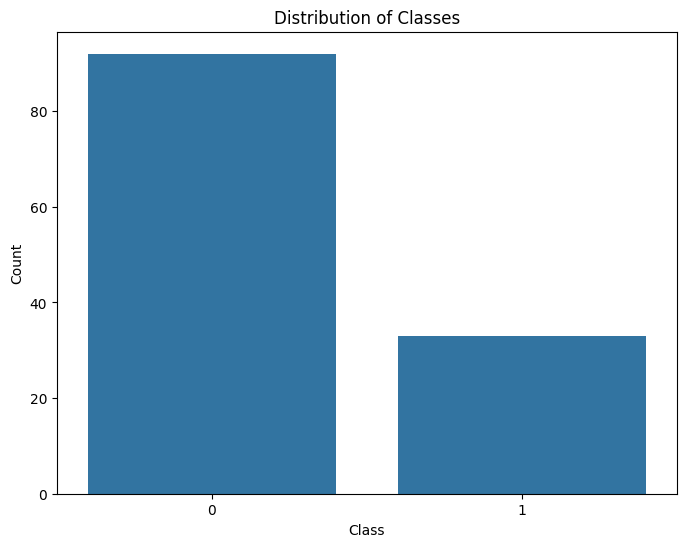

In [34]:
#1.Distribution of Classes
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=resume_df)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

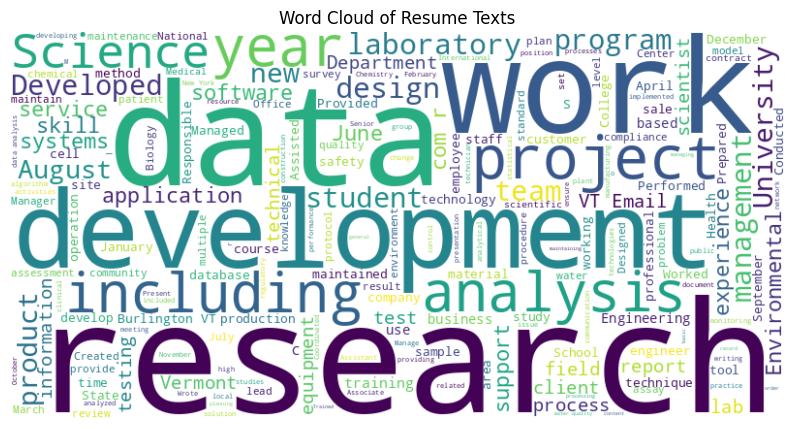

In [35]:
# 2. Word Cloud of Resume Texts
resume_text = ' '.join(resume_df['resume_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(resume_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Resume Texts')
plt.show()

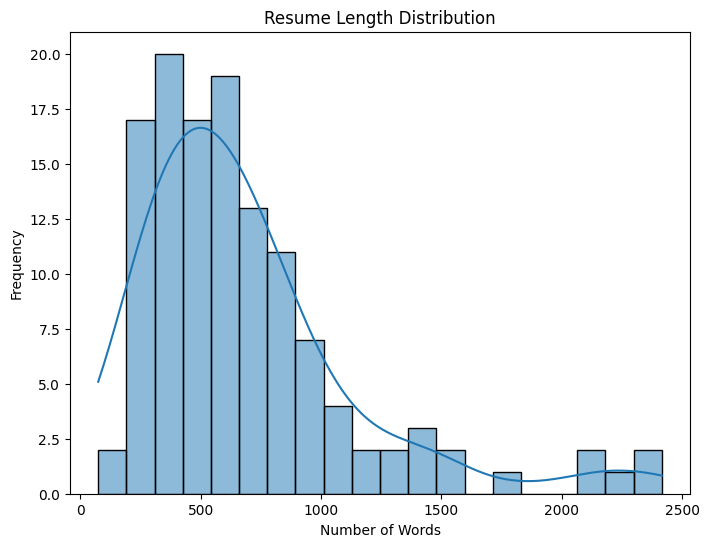

In [36]:
# 3. Resume Length Distribution
resume_df['text_length'] = resume_df['resume_text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 6))
sns.histplot(resume_df['text_length'], bins=20, kde=True)
plt.title('Resume Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

### STEP 6: PREPARING THE DATA BY APPLYING COUNT VECTORIZATION

In [38]:
# CONVERTING SENTENCES INTO TOKENIZED FORMS AND THEN CONVERTING TO NUMERICAL VALUES IN ORDER FOR THE MODEL TO TRAIN:

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
countvectorizer = vectorizer.fit_transform(resume_df['cleaned'])

print(vectorizer.get_feature_names_out())

['aaalac' 'aabb' 'aac' ... 'ãæcomputer' 'ètravel' 'ô_torrent']


In [39]:
# PROCESSED DATA:
print(countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### STEP 7: TRAINING THE DATA USING DIFFERENT CLASSIFERS TO COMPARE ACCURACY

In [67]:
X = countvectorizer
y = resume_df['class']

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=100)

# Multinomial Naive Bayes Classifier
Bayes_clf = MultinomialNB(alpha=3)
Bayes_clf.fit(X_train, y_train)

# Logistic Regression Classifier
LogReg_clf = LogisticRegression()
LogReg_clf.fit(X_train, y_train)

# Support Vector Machine Classifier
SVM_clf = SVC()
SVM_clf.fit(X_train, y_train)

# Random Forest Classifier
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)

RandomForestClassifier()

### STEP 8: ASSESING THE TRAINED MODEL

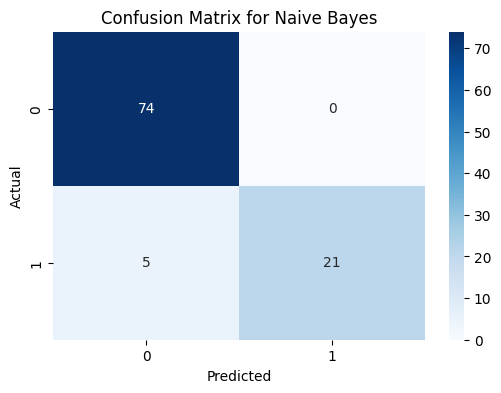

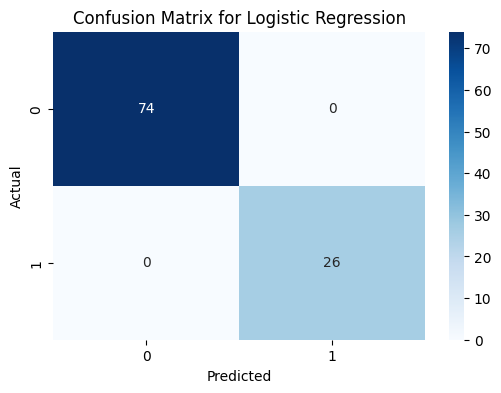

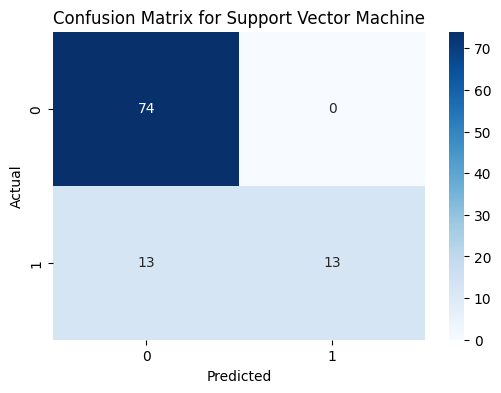

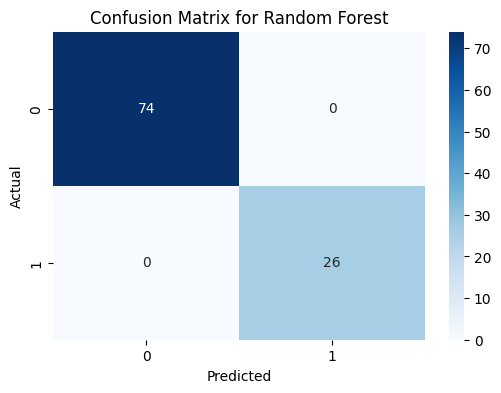

In [68]:
%matplotlib inline

#Training Data
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrix for Naive Bayes Classifier
plot_confusion_matrix(y_train, Bayes_clf.predict(X_train), 'Naive Bayes')

# Plot confusion matrix for Logistic Regression Classifier
plot_confusion_matrix(y_train, LogReg_clf.predict(X_train), 'Logistic Regression')

# Plot confusion matrix for Support Vector Machine Classifier
plot_confusion_matrix(y_train, SVM_clf.predict(X_train), 'Support Vector Machine')

# Plot confusion matrix for Random Forest Classifier
plot_confusion_matrix(y_train, RF_clf.predict(X_train), 'Random Forest')



*   From the Confusion Matrix of Training Data it is clearly shown that the classifiers Random Forest and Logistic Regression classified correctly for all the points.
*   Even Naive Bayes also classified correctly except for 2 points.






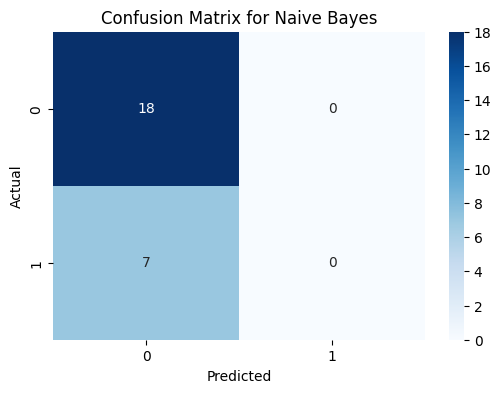

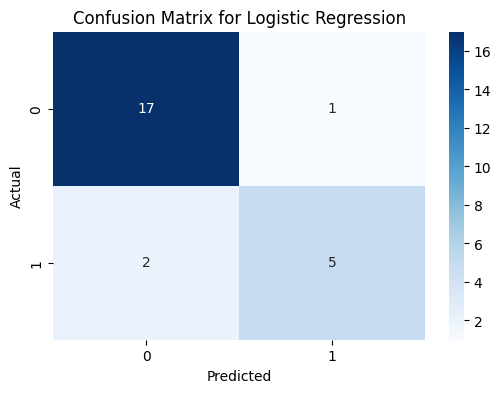

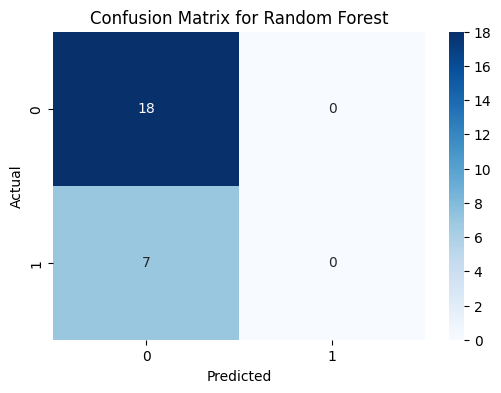

In [69]:
%matplotlib inline

# TESTING DATA:
# EXCLUDED SVM CLASSIFIER

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrix for Naive Bayes Classifier
plot_confusion_matrix(y_test, Bayes_clf.predict(X_test), 'Naive Bayes')

# Plot confusion matrix for Logistic Regression Classifier
plot_confusion_matrix(y_test, LogReg_clf.predict(X_test), 'Logistic Regression')

# Plot confusion matrix for Random Forest Classifier
plot_confusion_matrix(y_test, RF_clf.predict(X_test), 'Random Forest')


From the Confusion Matrix of Testing Data it is shown that Random Forest and Naive Bayes classifiers failed to predict the test data.

In [70]:
#Excluding Random Forest and Naive Bayes Classifiers
from sklearn.metrics import classification_report

print("Classification Report for Logistic Regression Classifier:")
print(classification_report(y_test, LogReg_clf.predict(X_test)))

Classification Report for Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.83      0.71      0.77         7

    accuracy                           0.88        25
   macro avg       0.86      0.83      0.84        25
weighted avg       0.88      0.88      0.88        25

